In [1]:
import os
import pandas as pd

In [2]:
# load up the CSV file as a DataFrame
filename = os.path.join('Downloads','topi_output.csv')
df = pd.read_csv(filename)

In [3]:
# show first five to demonstrate what is in the file
df.head(10)

,id,label,prediction_top,confidence_top,predictions_all,Species,ID
0,ASG0004sme,interacting,0,0.9989,"{'1': '0.0011', '0': '0.9989'}",topi,51252
1,ASG0004sme,moving,0,0.9396,"{'1': '0.0604', '0': '0.9396'}",topi,51252
2,ASG0004sme,standing,1,0.8958,"{'1': '0.8958', '0': '0.1042'}",topi,51252
3,ASG0004sme,count,1,0.9092,"{'9': '0.0001', '8': '0.0003', '2': '0.0729', ...",topi,51252
4,ASG0004sme,species,topi,0.9455,"{'giraffe': '0.0000', 'sable': '0.0000', 'bate...",topi,51252
5,ASG0004sme,resting,0,0.9891,"{'1': '0.0109', '0': '0.9891'}",topi,51252
6,ASG0004sme,babies,0,0.9987,"{'1': '0.0013', '0': '0.9987'}",topi,51252
7,ASG0004sme,eating,0,0.8970,"{'1': '0.1030', '0': '0.8970'}",topi,51252
8,ASG0004hr9,interacting,0,0.9615,"{'1': '0.0385', '0': '0.9615'}",topi,45543
9,ASG0004hr9,moving,0,0.9951,"{'1': '0.0049', '0': '0.9951'}",topi,45543


In [4]:
# filter the DataFrame to ONLY contain the species information
df = df[df.label=='species']

In [5]:
df.head()

,id,label,prediction_top,confidence_top,predictions_all,Species,ID
4,ASG0004sme,species,topi,0.9455,"{'giraffe': '0.0000', 'sable': '0.0000', 'bate...",topi,51252
12,ASG0004hr9,species,topi,0.7475,"{'giraffe': '0.0000', 'sable': '0.0000', 'bate...",topi,45543
20,ASG0000rye,species,topi,0.8210,"{'giraffe': '0.0000', 'sable': '0.0001', 'bate...",topi,8154
28,ASG0001eus,species,hartebeest,0.5111,"{'giraffe': '0.0023', 'sable': '0.0004', 'bate...",topi,16811
36,ASG0004hox,species,zebra,0.9994,"{'giraffe': '0.0000', 'sable': '0.0000', 'bate...",topi,45519


In [14]:
df.prediction_top.value_counts()

topi               1326
hartebeest          377
wildebeest          181
zebra                99
eland                63
gazellethomsons      50
buffalo              41
impala               40
giraffe              25
gazellegrants        19
warthog              18
otherbird            10
waterbuck             8
hyenaspotted          7
elephant              6
baboon                5
human                 5
reedbuck              4
ostrich               3
lionfemale            3
hippopotamus          3
guineafowl            2
kudu                  1
secretarybird         1
koribustard           1
batearedfox           1
Name: prediction_top, dtype: int64

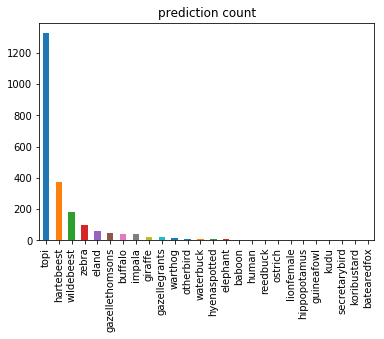

In [21]:
df.prediction_top.value_counts().plot.bar(title='prediction count')

In [8]:
# a quick look at the 'confidence_top' data
df['confidence_top'].describe()

count    2299.000000
mean        0.701721
std         0.230213
min         0.142200
25%         0.511450
50%         0.733800
75%         0.911150
max         1.000000
Name: confidence_top, dtype: float64

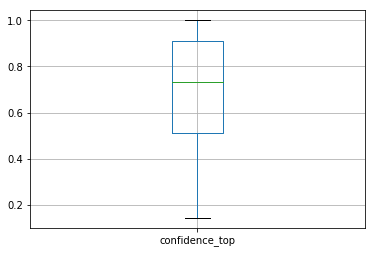

In [9]:
df.boxplot(column='confidence_top', showfliers=False)

In [10]:
# create a new data frame that only contains 'topi' as top prediction
tdf = df[df.prediction_top=='topi']
tdf.head()

,id,label,prediction_top,confidence_top,predictions_all,Species,ID
4,ASG0004sme,species,topi,0.9455,"{'giraffe': '0.0000', 'sable': '0.0000', 'bate...",topi,51252
12,ASG0004hr9,species,topi,0.7475,"{'giraffe': '0.0000', 'sable': '0.0000', 'bate...",topi,45543
20,ASG0000rye,species,topi,0.8210,"{'giraffe': '0.0000', 'sable': '0.0001', 'bate...",topi,8154
52,ASG0004sfv,species,topi,0.9363,"{'giraffe': '0.0000', 'sable': '0.0000', 'bate...",topi,51045
60,ASG0003uku,species,topi,0.9996,"{'giraffe': '0.0000', 'sable': '0.0000', 'bate...",topi,34253


In [11]:
# a quick look at the 'confidence_top' of eland ONLY predictions.
tdf['confidence_top'].describe()

count    1326.000000
mean        0.804334
std         0.182865
min         0.179900
25%         0.682625
50%         0.863100
75%         0.962075
max         1.000000
Name: confidence_top, dtype: float64

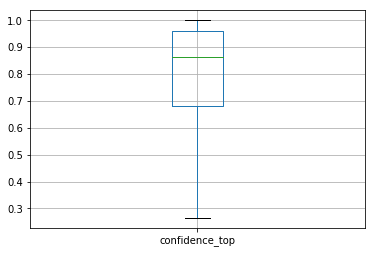

In [12]:
tdf.boxplot(column='confidence_top', showfliers=False)

In [13]:
# what is the percentage of EXACT match 'topi' to the whole set.
len(tdf)/float(len(df))

0.5767725097868639